## Test
#### A simple NN model on test MNIST dataset

In [10]:
import numpy as np
import tensorflow as tf

In [11]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

In [12]:
train_labels.shape

(60000,)

In [13]:
train_examples.shape

(60000, 28, 28)

In [14]:
type(train_examples)

numpy.ndarray

In [15]:
val_examples = train_examples[-6000:]
train_examples = train_examples[:-6000]
val_labels = train_labels[-6000:]
train_labels = train_labels[:-6000]

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_examples, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [16]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [17]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])




In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
epochs = 10
history = model.fit(train_dataset, epochs=epochs, validation_data=(val_examples, val_labels))


Epoch 1/10


2022-04-17 12:51:45.940091: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-17 12:51:45.940957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


603/844 [====================>.........] - ETA: 1s - loss: 4.6095 - sparse_categorical_accuracy: 0.8653

In [67]:
history.history

{'loss': [3.993692636489868,
  0.5847499370574951,
  0.3989848494529724,
  0.35219690203666687,
  0.2997611463069916,
  0.27638524770736694,
  0.2667351961135864,
  0.24200357496738434,
  0.21322128176689148,
  0.20964615046977997],
 'sparse_categorical_accuracy': [0.8747777342796326,
  0.9220555424690247,
  0.9415370225906372,
  0.9514259099960327,
  0.9565555453300476,
  0.9617407321929932,
  0.9653332829475403,
  0.968407392501831,
  0.9717592597007751,
  0.9718148112297058],
 'val_loss': [0.7532896399497986,
  0.4466246962547302,
  0.3866068124771118,
  0.4477400779724121,
  0.4193308353424072,
  0.41627103090286255,
  0.5176332592964172,
  0.5184866786003113,
  0.5315754413604736,
  0.5181880593299866],
 'val_sparse_categorical_accuracy': [0.9079999923706055,
  0.9399999976158142,
  0.9443333148956299,
  0.9494999647140503,
  0.949833333492279,
  0.9566666483879089,
  0.9543333053588867,
  0.9564999938011169,
  0.9564999938011169,
  0.9629999995231628]}

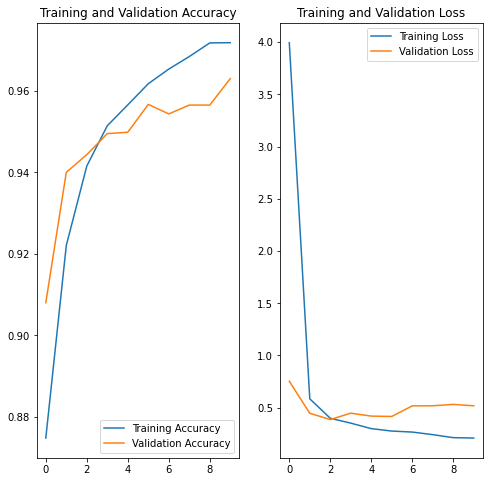

In [71]:
from matplotlib import pyplot as plt

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
model.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 0.6444 - sparse_categorical_accuracy: 0.9575


[0.6444269418716431, 0.9575000405311584]

In [ ]:
#  model = tf.keras.models.Sequential([
#    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
#                   activation='relu'),
#    tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
#                   activation='relu'),
#    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#  #   tf.keras.layers.Dropout(0.25),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(128, activation='relu'),
#  #   tf.keras.layers.Dropout(0.5),
#    tf.keras.layers.Dense(10, activation='softmax')
#  ])
# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer=tf.keras.optimizers.Adam(0.001),
#     metrics=['accuracy'],
# )
# model.fit(
#     train_dataset,
#     epochs=12,
    
# )